In [1]:
import pandas as pd
import glob
import numpy as np
import re

In [2]:
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["text.usetex"] = False
import matplotlib.pyplot as plt

# Scenario 1: return a list most similar region sets and their similarity score to a query metadata label (l2r)

In [ ]:
# Path to the pre-calculated distance file between label embedding and region set embeddings
path_simfile = './distance_l2r.csv'
distance = pd.read_csv(path_simfile)
distance.file_label = distance.file_label.str.lower()
distance.search_term = distance.search_term.str.lower()
distance = distance.drop_duplicates()

In [4]:
# Print the search terms (labels)
print(distance.search_term.unique())

['h3k4me3' 'h3k27me3' 'h3k27ac' 'h3k4me1' 'h3k9me3' 'h3k4me2' 'h3k9ac'
 'h3k79me2' 'h4k20me1' 'h3k9me2' 'h3k9me1']


In [5]:
def S1(searchterm, distance):
    nof = len(distance[distance.file_label.str.contains(searchterm)])
    df = distance[distance.search_term == searchterm].sort_values(by=['score'], ascending = False)[0:10]
    df = df.sort_values(by=['score'], ascending=True)
    df['color']='gray'
    df.loc[df.file_label.str.contains(searchterm), 'color'] = 'green'
    if(len(df[df.color == 'green']) == nof):
        df.loc[(df.color!='green'), 'color'] = 'gray'
        
    plt= df.plot.barh(x='filename', y='score', figsize=(10,7), fontsize=16, color=list(df['color']))
    plt.set_xlabel('Search term:' + searchterm, fontsize=15)

    plt.axis(xmin=0.5, xmax=1.01)


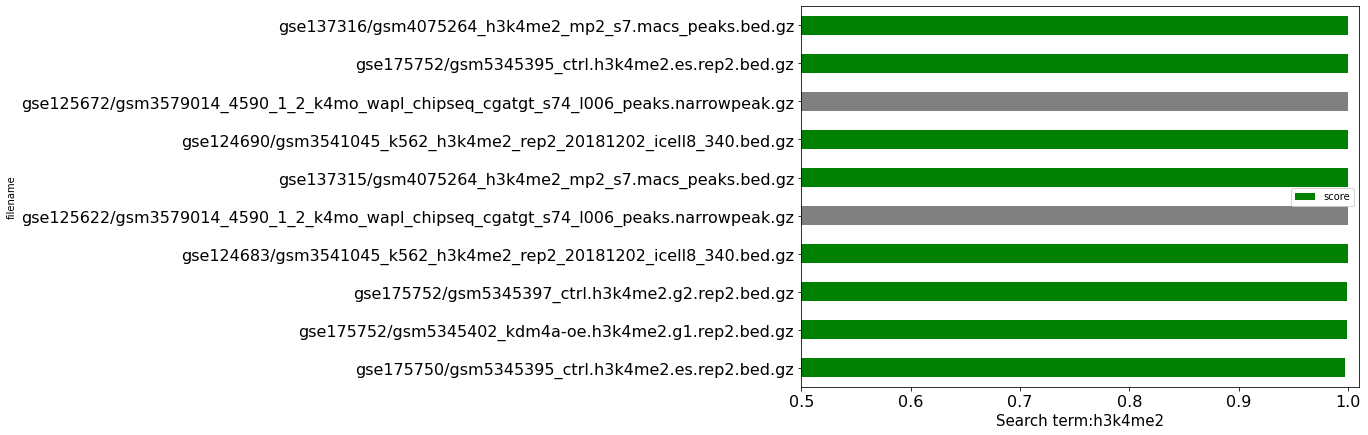

In [6]:
S1('h3k4me2', distance)

# Scenario 2: return a list of most similar labels and thier similarity score to a query region set (r2l)

In [7]:
# Print a sample of filenames

print(list(set(distance.filename))[0:4])

['gse124683/gsm3540312_k562_h3k4me2_rep1_20181202_icell8_21.bed.gz', 'gse175750/gsm5345532_kdm4a-oe.h3k9ac.ls.rep2.bed.gz', 'gse161624/gsm4911338_etv6_ncoa2_tm_hcd34_h3k27ac_vs_total_peaks.narrowpeak.gz', 'gse124690/gsm3540920_k562_h3k4me2_rep2_20181202_icell8_215.bed.gz']


In [8]:
def S2(file, distance):
    df = distance[distance.filename == file].sort_values(by=['score'], ascending = False)[0:10]
    df= df.sort_values(by=['score'], ascending = True)
    df['color']='green'
    plt= df.plot.barh(x='search_term', y='score', figsize=(8,5), fontsize=16, color=list(df['color']))
    plt.set_xticks(np.arange(0.5,1.1, 0.1))
    plt.set_ylabel('Similarity', fontsize=15)
    plt.set_xlabel(file, fontsize=15)
    

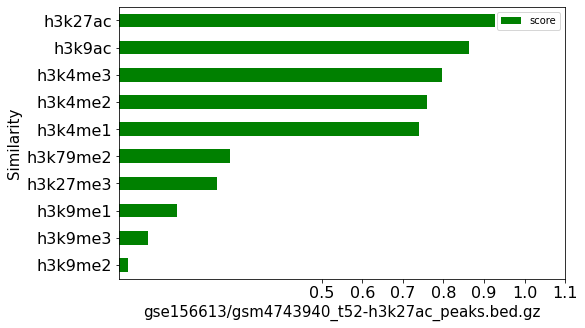

In [9]:
S2('gse156613/gsm4743940_t52-h3k27ac_peaks.bed.gz', distance)

# Scenario 3: return a list of most similar region sets and thier similarity scores to a query region set (r2r)

In [11]:
file_name = './distance_r2r.csv'
distance_s3 = pd.read_csv(file_name)
distance_s3.score = 1 - distance_s3.score

In [12]:
# print sample query region set
list(set(distance_s3.test_file))[0:10]

['ENCFF538OAF.bed.gz,h3k4me1',
 'ENCFF494ASP.bed.gz,h3k27me3',
 'ENCFF292YSJ.bed.gz,h3k4me3',
 'ENCFF001WUM.bed.gz,h3k4me3',
 'ENCFF701ENX.bed.gz,h3k27ac',
 'ENCFF727GSV.bed.gz,h3k27ac',
 'ENCFF787BOJ.bed.gz,h3k27me3',
 'ENCFF526BJR.bed.gz,h3k27ac',
 'ENCFF908TKC.bed.gz,h3k9me3',
 'ENCFF099WAJ.bed.gz,h4k20me1']

In [13]:
def S3(query_file, distance_s3):
    
    df = distance_s3[distance_s3.test_file==query_file].sort_values(by ='score', ascending = False)[['test_file', 'train_file', 'score']]
    df['label_test'] = df.test_file.str.split(',', expand = True)[1]
    df['label_train'] = df.train_file.str.split(',', expand = True)[1]
    
    nof = len(df[df.label_test==df.label_train])
    df = df[0:10]
    

    df=df.sort_values(by=['score'])
    df['color']='gray'
    df.loc[df.label_test==df.label_train, 'color'] = 'green'
    
    if(len(df[df.color=='green']) ==nof):

        df.loc[(df.color!='green'), 'color'] = 'gray'
  
    plt= df.plot.barh(x='train_file', y='score', figsize=(10,7), fontsize=16, color=list(df['color']))
    plt.axis(xmin=0.7,xmax=1.01)
    
    plt.set_ylabel('Similarity', fontsize=15)
    plt.set_xlabel(query_file, fontsize=15)

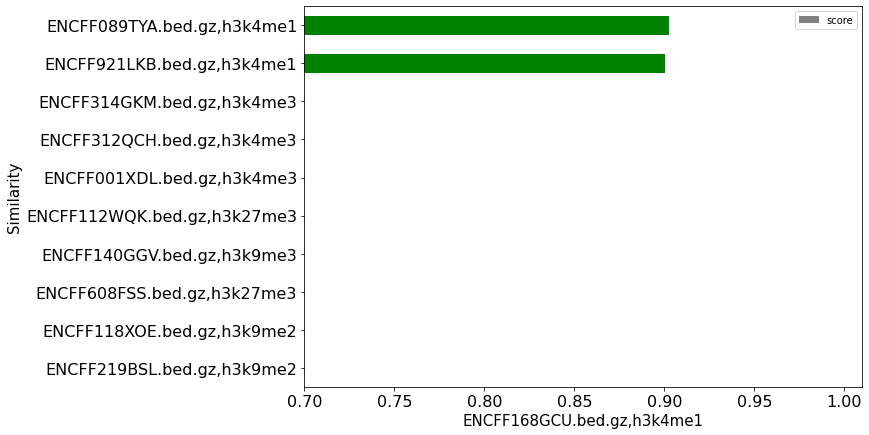

In [16]:
S3('ENCFF168GCU.bed.gz,h3k4me1', distance_s3)